In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [ ]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=199)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_train,y_train)

0.8375

In [ ]:
model.score(X_test,y_test)

0.8875

# ROC Curve

In [ ]:
model.predict_proba(X_test)

In [ ]:
model.predict_proba(X_test)[:,1]

array([0.30836264, 0.91079273, 0.13700251, 0.00401364, 0.88616071,
       0.26557903, 0.55949243, 0.21612017, 0.99728588, 0.19815624,
       0.42705761, 0.87926715, 0.18204413, 0.31550988, 0.1630387 ,
       0.969827  , 0.8154532 , 0.93892347, 0.02560173, 0.5908719 ,
       0.99426102, 0.92376635, 0.00518353, 0.02644595, 0.0780933 ,
       0.13476784, 0.78985382, 0.00831599, 0.98412275, 0.05254734,
       0.00132795, 0.95645756, 0.00688454, 0.0142874 , 0.73021371,
       0.17713787, 0.01319186, 0.90149143, 0.99146485, 0.24832158,
       0.92737277, 0.96220317, 0.35798254, 0.01415401, 0.25640291,
       0.00131539, 0.00388266, 0.33006896, 0.0373644 , 0.04169682,
       0.33854344, 0.00638312, 0.00600248, 0.00117359, 0.00283913,
       0.05827129, 0.02258472, 0.1630387 , 0.14744885, 0.99654298,
       0.59661342, 0.00170823, 0.33854344, 0.26557903, 0.79533085,
       0.00940094, 0.06287203, 0.17783311, 0.01900801, 0.0475731 ,
       0.17713787, 0.20895466, 0.36567181, 0.05596516, 0.05723

In [ ]:
#Plot ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

0.9574036511156186


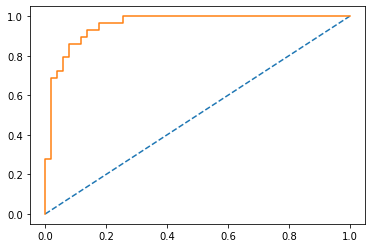

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = model.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

# If the auc score >= CL , accept the model

In [ ]:
#Note: For this example use of ROC is invalid since the dataset is an UNBALANCED dataset.

# PR Curve

0.9164619166014315


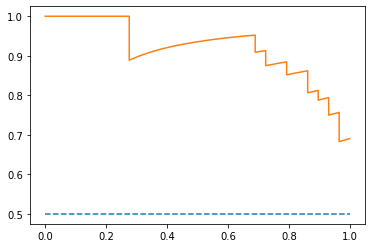

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model.predict_proba(X_test)[:,1]

#Step2: Calc PR and AUC
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)
aucPR = auc(recall,precision)
print(aucPR)

#Step3: Plot the Skill line (0,0.5) (1,0.5)
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR Curve
plt.plot(recall,precision)


In [ ]:

# We will accept the model !!!